In [99]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr


In [100]:
#1 Завантажте набір даних
file = pandas.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv", sep=",",
encoding="utf8", engine='python')

In [101]:
file = file.drop(['link','old_price', 'Unnamed: 0'],  axis=1) 
file['designer'] = file['designer'].replace(r'^.{3}\..*', value='No information',  regex=True)
designers_split = [sorted(item.split('/')) for item in file['designer']]
file['designer'] = ['/'.join(item) for item in designers_split]

In [102]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            3694 non-null   int64  
 1   name               3694 non-null   object 
 2   category           3694 non-null   object 
 3   price              3694 non-null   float64
 4   sellable_online    3694 non-null   bool   
 5   other_colors       3694 non-null   object 
 6   short_description  3694 non-null   object 
 7   designer           3694 non-null   object 
 8   depth              2231 non-null   float64
 9   height             2706 non-null   float64
 10  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(1), object(5)
memory usage: 292.3+ KB


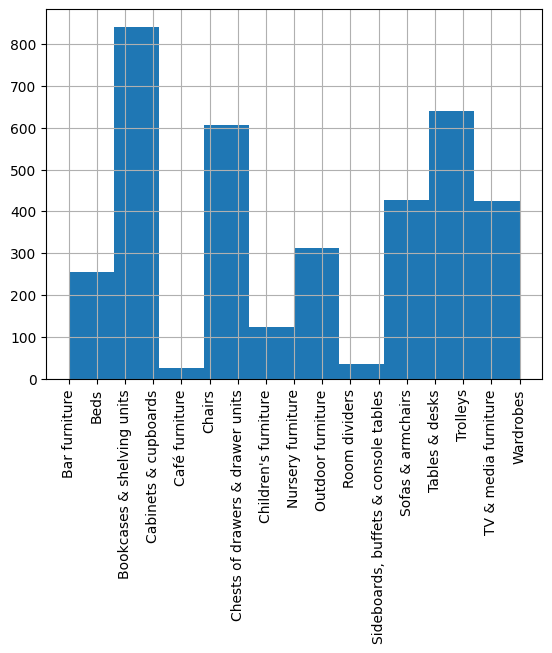

In [103]:
file['category'].hist()
plt.xticks(rotation=90)
plt.show()

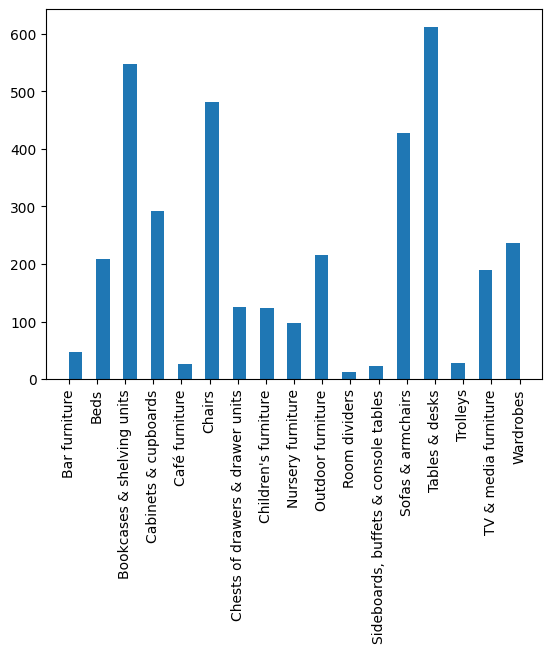

In [123]:
plt.hist(file["category"], bins=33)
plt.xticks(rotation=90)
plt.show()

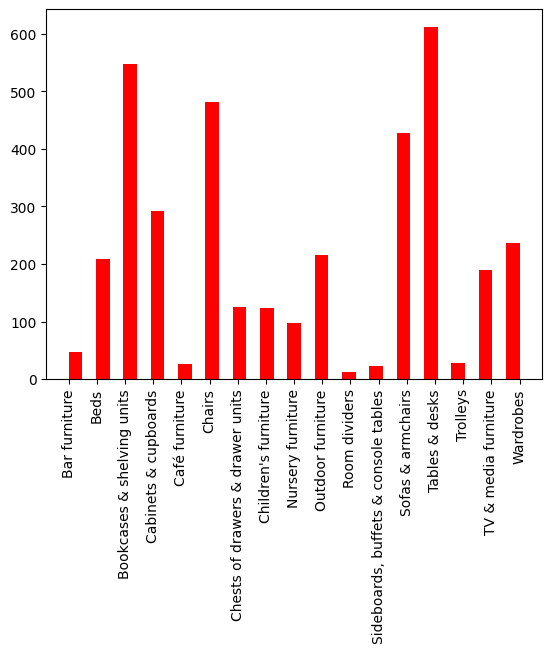

In [124]:
plt.hist(file["category"],bins = 33, color = 'red')
plt.xticks(rotation=90)
plt.show()

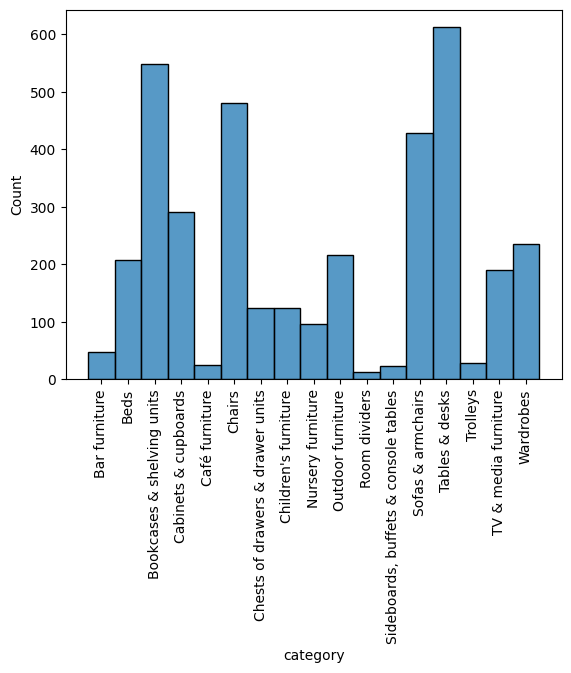

In [105]:
sns.histplot(file['category'])
plt.xticks(rotation=90)
plt.show()

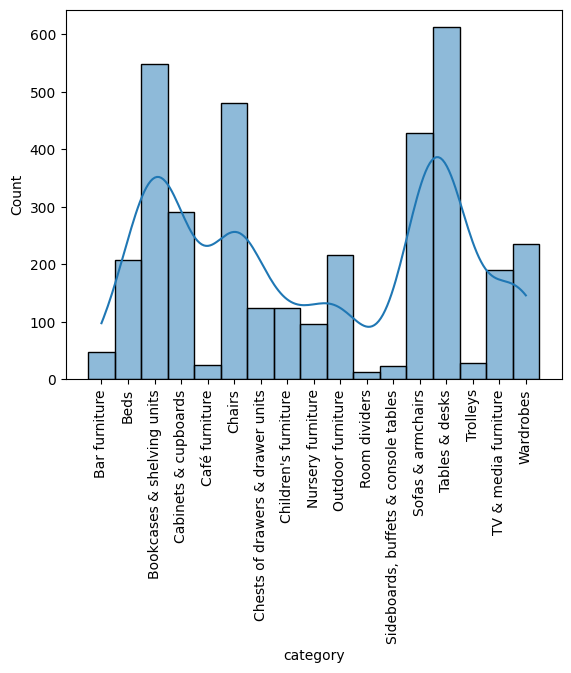

In [106]:
sns.histplot(file['category'], kde=True)
plt.xticks(rotation=90)
plt.show()

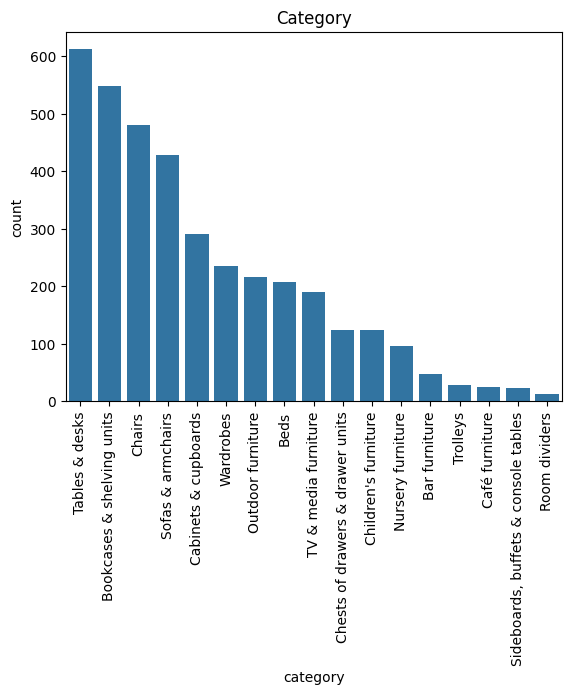

In [107]:
category_counts = file['category'].value_counts().sort_values(ascending=False)
plt.figure()
sns.countplot(x=file['category'], data=file, order=category_counts.index)
plt.xticks(rotation=90)
plt.title('Category')
plt.show()


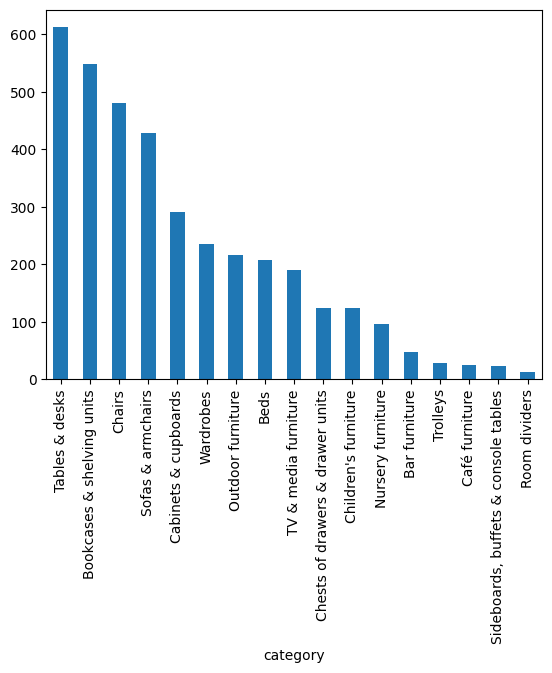

In [108]:
file['category'].value_counts().sort_values(ascending=False).plot(kind='bar', rot=90)
plt.show()


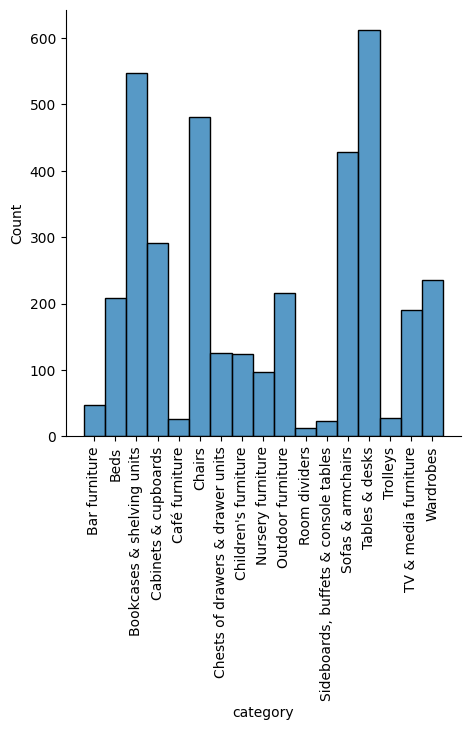

In [112]:
sns.displot(file['category'])
plt.xticks(rotation=90)
plt.show()

In [149]:
file['category'].value_counts(normalize= True) *100

category
Tables & desks                          16.567407
Bookcases & shelving units              14.834867
Chairs                                  13.021115
Sofas & armchairs                       11.586356
Cabinets & cupboards                     7.904710
Wardrobes                                6.388738
Outdoor furniture                        5.847320
Beds                                     5.630753
TV & media furniture                     5.143476
Chests of drawers & drawer units         3.383866
Children's furniture                     3.356795
Nursery furniture                        2.625880
Bar furniture                            1.272334
Trolleys                                 0.757986
Café furniture                           0.703844
Sideboards, buffets & console tables     0.622631
Room dividers                            0.351922
Name: proportion, dtype: float64

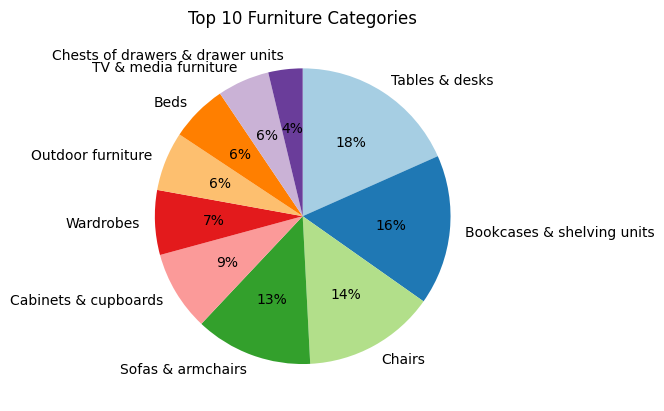

In [190]:
# Получаем количество элементов в каждой категории и ограничиваемся 10 самыми популярными категориями
count = file['category'].value_counts().head(10)

# Построение круговой диаграммы
plt.pie(count.values, labels=count.index, colors=sns.color_palette("Paired"),
        autopct='%1.0f%%', startangle=90, counterclock=False)
plt.title('Top 10 Furniture Categories')  # Установка заголовка графика
plt.show()